In [89]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


In [90]:
data = pd.read_csv('/content/tips.csv')

In [91]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [92]:
data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [93]:
X = data.drop(['total_bill'], axis=1)
y= data.total_bill


In [94]:
X.time.nunique()

2

In [95]:
y

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

,tip,sex,smoker,day,time,size
0,1.01,Female,No,Sun,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
3,3.31,Male,No,Sun,Dinner,2
4,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,5.92,Male,No,Sat,Dinner,3
240,2.00,Female,Yes,Sat,Dinner,2
241,2.00,Male,Yes,Sat,Dinner,2
242,1.75,Male,No,Sat,Dinner,2


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV



rfr = RandomForestRegressor(random_state=1)
rfecv = RFECV(estimator=rfr, step=1, cv=10, scoring='neg_mean_squared_error')

rfecv.fit(X.select_dtypes(exclude="object"), y)


RFECV(cv=10, estimator=RandomForestRegressor(random_state=1),
      scoring='neg_mean_squared_error')

In [61]:
print('Optimal Number of features is : {}'.format(rfecv.n_features_))
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis =1 ,inplace=True)


Optimal Number of features is : 3


In [97]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

ValueError: could not convert string to float: 'Female'

In [85]:
var_thres.get_support()


array([ True,  True,  True])

In [86]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.35925176, 0.26041094, 0.        ])

In [87]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

tip           0.359252
size          0.260411
smoker_Yes    0.000000
dtype: float64

In [88]:
X_train

,tip,size,smoker_Yes
50,2.50,2,0
89,3.00,2,0
48,2.05,3,0
76,3.08,2,1
212,9.00,4,0
...,...,...,...
147,1.63,2,0
17,3.71,3,0
162,2.00,3,0
112,4.00,3,0


In [98]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [99]:
corr_features = correlation(X.select_dtypes(exclude="object"), 0.8)
len(set(corr_features))

0

In [100]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

In [116]:
num_features = X_train.select_dtypes(exclude="object")
cat_features = X_train.select_dtypes(include="object")

In [117]:
num_features

,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
153,2.00,4,1,0,0,1,0,0
173,3.18,2,1,1,0,1,0,0
100,2.50,2,0,1,0,0,0,0
223,3.00,3,0,0,0,0,0,1
42,3.06,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
28,4.30,2,1,0,1,0,0,0
205,3.23,3,0,1,0,0,1,1
188,3.50,3,0,1,0,1,0,0
102,2.50,3,0,1,1,0,0,0


In [118]:
cat_features

""
153
173
100
223
42
...
28
205
188
102


In [119]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np
from tqdm import tqdm

from sklearn.linear_model import BayesianRidge, HuberRegressor, PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [120]:


step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', MinMaxScaler(feature_range=(0,1
                                               )), num_features.columns)
    ],
    remainder='passthrough'
)


In [121]:
# Function to evaluate regression model

import warnings
warnings.filterwarnings("ignore")
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    return r2, adj_r2, mse, mae

# Initialize different regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regressor': HuberRegressor(),
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    'MLP Regressor': MLPRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'LightGBM Regressor': LGBMRegressor(),

}

# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error"]
print(tabulate(results, headers, tablefmt="grid"))

100%|██████████| 18/18 [00:01<00:00, 15.22it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 195, number of used features: 8
[LightGBM] [Info] Start training from score 19.930769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

100%|██████████| 1/1 [00:00<00:00,  8.41it/s]


+-----------------+-------------+----------------------+----------------------+-----------------------+
| Model           |   R-squared |   Adjusted R-squared |   Mean Squared Error |   Mean Absolute Error |
+=================+=============+======================+======================+=======================+
| Huber Regressor |    0.664524 |             0.597429 |              32.5591 |               3.86968 |
+-----------------+-------------+----------------------+----------------------+-----------------------+


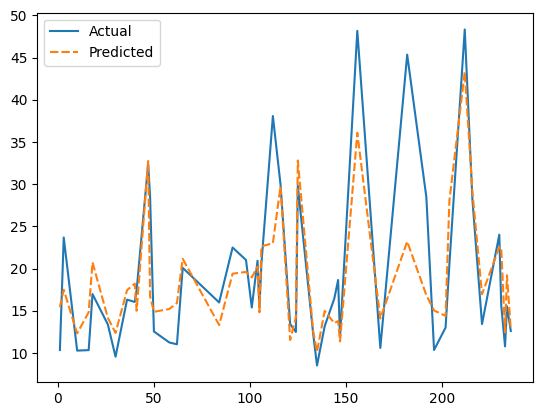

In [122]:
# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    diff = pd.DataFrame(
{
    'Actual':y_test,
    'Predicted':y_pred
})


    sns.lineplot(data= diff)

    return r2, adj_r2, mse, mae

# Initialize different regression models
regression_models = {

    'Huber Regressor': HuberRegressor(),
}
# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error"]
print(tabulate(results, headers, tablefmt="grid"))

In [109]:
model.get_params()

{'alpha': 0.0001,
 'epsilon': 1.35,
 'fit_intercept': True,
 'max_iter': 100,
 'tol': 1e-05,
 'warm_start': False}

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Different values for alpha
    'epsilon': [0.01, 0.1, 1.0, 1.35, 2.0],  # Different values for epsilon
    'fit_intercept': [True, False],  # True or False for fit_intercept
    'max_iter': [100, 200, 300],  # Different values for max_iter
    'tol': [1e-4, 1e-5, 1e-6],  # Different values for tol
    'warm_start': [True, False]  # True or False for warm_start
}

# Create the Linear Regression model
linear_reg = HuberRegressor()

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your data

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'alpha': 0.1, 'epsilon': 2.0, 'fit_intercept': False, 'max_iter': 100, 'tol': 0.0001, 'warm_start': True}
Best score: 0.5132645283009774


In [113]:
X_test = pd.get_dummies(X_test, drop_first = True)

In [ ]:
X_test

In [82]:
from sklearn.model_selection import KFold, cross_val_score

In [83]:
folds = KFold(n_splits = 5, shuffle = True, random_state = None)
scores = cross_val_score(model, X, y, scoring='r2', cv=folds)
scores
print(scores.mean())

0.5203569168700771
